In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


# Loading Data

In [2]:
# Reading the train and test data
train = pd.read_csv('/kaggle/input/titanic/train.csv')
print('Train Data shape :', train.shape)

test = pd.read_csv('/kaggle/input/titanic/test.csv')

Train Data shape : (891, 12)


We will now look at the data

In [3]:
# First 5 observations of the train data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Last 5 observations of the train data
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Check if the data has null values

In [5]:
# Sort by number of null values
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [6]:
# Columns of the data
list(test)

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [7]:
# Check sample submission
sub = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [8]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [9]:
sub.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


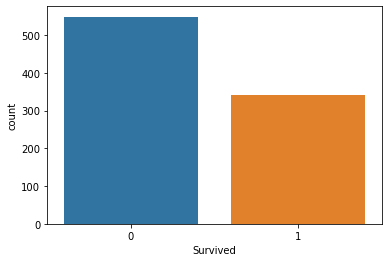

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot for 'Survived' feature
sns.countplot(train['Survived'])
plt.show()

We will check how 'Sex' and 'Embarked' related to 'Survived' feature

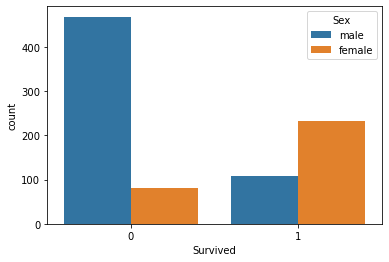

In [11]:
# Sex
sns.countplot(x = 'Survived', hue = 'Sex', data = train)
plt.show()

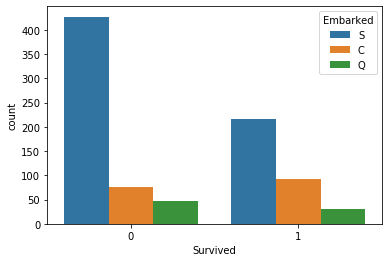

In [12]:
# Embarked
sns.countplot(x = 'Survived', hue = 'Embarked', data = train)
plt.show()

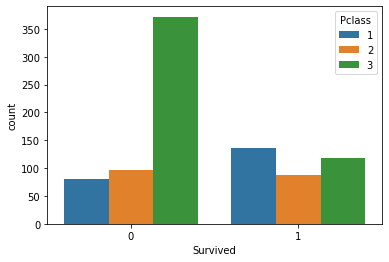

In [13]:
# Pclass
sns.countplot(x = 'Survived', hue = 'Pclass', data = train)
plt.show()

Let's plot the correlation matrix for the features

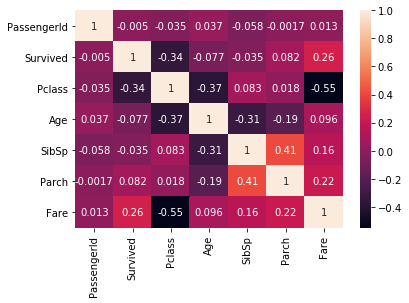

In [14]:
sns.heatmap(train.corr(), annot = True)
plt.show()

From this Pclass and Age are related as the absolute value of correlation is higher. So we will fill the missing values in age with the use of Pclass feature 

In [15]:
df = train.groupby('Pclass')['Age']
print(df.mean())

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [16]:
# Replace missing values with their means for the corresponding Pclass
train.loc[train.Age.isnull(), 'Age'] = train.groupby("Pclass").Age.transform('mean')
test.loc[test.Age.isnull(), 'Age'] = test.groupby("Pclass").Age.transform('mean')

Similarly we fill the missing values in Embarked with mode

In [17]:
from statistics import mode
train['Embarked'] = train['Embarked'].fillna(mode(train['Embarked']))

In [18]:
# Check for the null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

So these features look very much related to target varaible so we will proceed with them for now.[](http://)

Let us transform our categorical features into numeric to feed our model

In [19]:
# # Convert 'Sex' feature to integer form!
# train.loc[train.Sex == 'male', 'Sex'] = 0
# train.loc[train.Sex == 'female', 'Sex'] = 1

# # Convert 'Embarked' feature to integer form!
# train.loc[train.Embarked == 'S', 'Embarked'] = 0
# train.loc[train.Embarked == 'C', 'Embarked'] = 1
# train.loc[train.Embarked == 'Q', 'Embarked'] = 2

# Convert 'Sex' variable to integer form!
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1

# Convert 'Embarked' variable to integer form!
train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernel

In [20]:
# # Convert 'Sex' feature to integer form!
# test.loc[test.Sex == 'male', 'Sex'] = 0
# test.loc[test.Sex == 'female', 'Sex'] = 1

# # Convert 'Embarked' feature to integer form!
# test.loc[test.Embarked == 'S', 'Embarked'] = 0
# test.loc[test.Embarked == 'C', 'Embarked'] = 1
# test.loc[test.Embarked == 'Q', 'Embarked'] = 2

# Convert 'Sex' variable to integer form!
test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1

# Convert 'Embarked' variable to integer form!
test["Embarked"][test["Embarked"] == "S"] = 0
test["Embarked"][test["Embarked"] == "C"] = 1
test["Embarked"][test["Embarked"] == "Q"] = 2

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernel

let's start with the basic model Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
x = train[['Sex', 'Age', 'Pclass', 'Embarked']]

x.info()
y = train['Survived']
LogReg.fit(x, y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    object 
 1   Age       891 non-null    float64
 2   Pclass    891 non-null    int64  
 3   Embarked  891 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 28.0+ KB


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
x = test[['Sex', 'Age', 'Pclass', 'Embarked']]

x.info()
test['Survived'] = LogReg.predict(x)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       418 non-null    object 
 1   Age       418 non-null    float64
 2   Pclass    418 non-null    int64  
 3   Embarked  418 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 13.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null   

In [44]:
test[['PassengerId', 'Survived']].to_csv('titanic_submission_LG.csv', index = False)

In [45]:
from IPython.display import FileLink
FileLink(r'titanic_submission_LG.csv')

/kaggle/working/titanic_submission_LG.csv

Random Forest

In [32]:
# Set our parameter grid
param_grid = { 
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [100, 300, 500],
    'max_features': ['auto', 'log2'],
    'max_depth' : [3, 5, 7]    
}

In [31]:
from sklearn.ensemble import RandomForestClassifier

#Initialize randomForest
randomForest = RandomForestClassifier(random_state = 2)


In [36]:
from sklearn.model_selection import GridSearchCV

# Grid search
randomForest_CV = GridSearchCV(estimator = randomForest, param_grid = param_grid, cv = 5)
x = train[['Sex', 'Age', 'Pclass', 'Embarked']]
y = train['Survived']

x.info()
print(y)

randomForest_CV.fit(x, y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    object 
 1   Age       891 non-null    float64
 2   Pclass    891 non-null    int64  
 3   Embarked  891 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 28.0+ KB
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=2,
                                   

In [37]:
# Print best hyperparameters
randomForest_CV.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'n_estimators': 500}

In [38]:
# Define our optimal randomForest algo
randomForestFinalModel = RandomForestClassifier(random_state = 2, criterion = 'gini', max_depth = 3, max_features = 'auto', n_estimators = 500)

In [41]:
# Fit the model to the training set
x = train[['Sex', 'Age', 'Pclass', 'Embarked']]
y = train['Survived']
randomForestFinalModel.fit(x, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [42]:
# Prediction
x = test[['Sex', 'Age', 'Pclass', 'Embarked']]
test['Survived'] = randomForestFinalModel.predict(x)

In [43]:
test[['PassengerId', 'Survived']].to_csv('titanic_submission_RF.csv', index = False)

In [ ]:
from IPython.display import FileLink
FileLink(r'titanic_submission_RF.csv')